## Let us try to code up a small-scale Hamiltonian solver

In [9]:
# Let us first form the N=2 (L=4) fermion chain with 1 impurity matrix of dimension 32
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

t = 1
j = 1

kondo_ham = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,-t,j,0,0,0,0,0,0,0,0,0,j,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,j,0,0,0,0,0,0,0,0,0,j,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,-t,-j,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,-j,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,-j,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,-j,-t,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,j,0,0,0,0,0,0,0,0,0,j,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,j,0,0,0,0,0,0,0,0,0,j,-t,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,-t,j,0,0,0,0,0,0,0,0,0,j,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,j,0,0,0,0,0,0,0,0,0,j,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,-t,-j,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0,0,-j,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-j,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-j,-t,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,j,0,0,0,0,0,0,0,0,0,j,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,j,0,0,0,0,0,0,0,0,0,j,-t,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-t,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

def check_symmetric(a, rtol=1e-05, atol=1e-08): #check if matrix formed is real symmetric or not
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

print(check_symmetric(kondo_ham))
#print(kondo_ham - kondo_ham.T)


True
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [10]:
# We use the eigh method for finding the eigenvalues and vectors

eigenvalues, eigenvectors = np.linalg.eigh(kondo_ham)

print(eigenvalues)
print(eigenvectors)

[-2.26180225e+00 -2.26180225e+00 -1.61803399e+00 -1.61803399e+00
 -1.61803399e+00 -1.61803399e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -4.14213562e-01 -4.14213562e-01
 -3.39876887e-01 -3.39876887e-01 -8.72276612e-16 -6.77158701e-16
 -6.71231029e-16  0.00000000e+00  0.00000000e+00  1.31211142e-15
  6.18033989e-01  6.18033989e-01  6.18033989e-01  6.18033989e-01
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  2.41421356e+00  2.41421356e+00  2.60167913e+00  2.60167913e+00]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00

In [ ]:
# Let us now try to code up the entire process

#def kondo_chain(N):  #Number of qubits in one chain
    

In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import UnitarySimulator
from qiskit.circuit.library import EvolvedOperatorAnsatz as exp_M
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator

In [4]:
def zz_rotation(rz_angle):
    z_rotation = Operator([[cm.exp(1j*rz_angle/2),0,0,0],
                   [0,cm.exp(-1j*rz_angle/2),0,0],
                   [0,0,cm.exp(-1j*rz_angle/2),0],
                   [0,0,0,cm.exp(1j*rz_angle/2)]])
    return z_rotation
    
def fsim(theta,phi,beta):
    fsim = Operator([[1,0,0,0],
                   [0,m.cos(theta),1j*cm.exp(1j*beta)*m.sin(theta),0],
                   [0,1j*cm.exp(-1j*beta)*m.sin(theta),m.cos(theta),0],
                   [0,0,0,cm.exp(1j*phi)]])
    return fsim

transform = Operator([[0,1,0,0],
                   [0,0,1,0],
                   [0,0,0,1],
                   [1,0,0,0]])
tranform_adj = transform.adjoint()

def kondo_step(theta_k):
    qc = QuantumCircuit(3)
    qc.unitary(transform,[0,2],label=r"$O$")
    #qc.reset(0)
    qc.unitary(fsim(theta_k,0,0),[1,2],label = r'fsim$(\theta_k)$')
    qc.unitary(zz_rotation(theta_k/2),[1,2],label = r'$e^{i\frac{\theta_k}{2}ZZ}$')
    qc.unitary(tranform_adj,[0,2],label = r'$O^\dag$')

    #qc = qc.to_gate()
    

    return qc

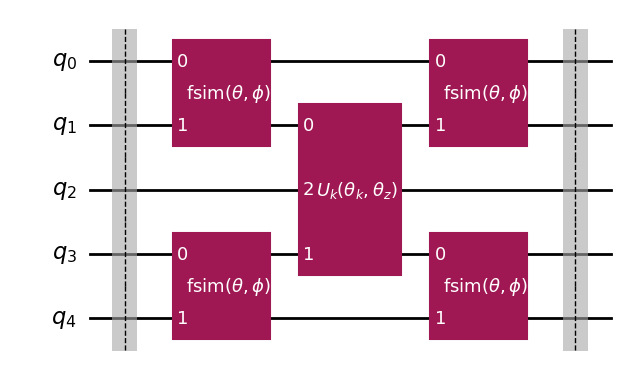

In [5]:
# Let us try to find the eigenvectors of the unitary matrix that we have got in a single step trotterization


# Let us use the direct 8 by 8 unitary now for the problem
import math as m
import cmath as cm

def kondo_unitary(theta_k,theta_z):

    l1 = cm.exp(1j*theta_z/2)
    l2 = cm.exp(-1j*theta_z/2)
    c1 = m.cos(theta_k)
    s1 = m.sin(theta_k)

    kondo_unitary = Operator([[1,0,0,0,0,0,0,0],
                          [0,1,0,0,0,0,0,0],
                          [0,0,l1,0,0,0,0,0],
                          [0,0,0,c1*l2,1j*l2*s1,0,0,0],
                          [0,0,0,1j*l2*s1,c1*l2,0,0,0],
                          [0,0,0,0,0,l1,0,0],
                          [0,0,0,0,0,0,1,0],
                          [0,0,0,0,0,0,0,1]])
    
    return kondo_unitary

def add_fsim_half(qc,angles):
    theta = angles[0]
    phi = angles[1]
    beta = angles[2]

    fsim1 = fsim(theta,phi,beta)
    #Adding fsim in even layers
    for i in range(0,qc.num_qubits//2-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

    for i in range(qc.num_qubits//2+1,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')
        
    #Adding fsim in odd layers
    for i in range(1,qc.num_qubits//2-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

    for i in range(qc.num_qubits//2+2,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

def add_fsim_inv_half(qc,angles):
    theta = angles[0]
    phi = angles[1]
    beta = angles[2]

    fsim1 = fsim(theta,phi,beta)

    #Adding fsim in odd layers
    for i in range(1,qc.num_qubits//2-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

    for i in range(qc.num_qubits//2+2,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')
        
    #Adding fsim in even layers
    for i in range(0,qc.num_qubits//2-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

    for i in range(qc.num_qubits//2+1,qc.num_qubits-1,2):
        qc.unitary(fsim1,[i,i+1],label = r'fsim$(\theta,\phi)$')

def circuit_3(num_qubits, pos1, trotter_steps,angles = [0,0,0],theta_k = 0,theta_z = 0, num_cl_bits = 0, trotter_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)
    if pos1 != 0:
        qc.x(pos1-1)
    qc.barrier()
    c = num_qubits//2
    for trotter_step in range(trotter_steps):
        add_fsim_half(qc,angles)
        qc.unitary(kondo_unitary(theta_k,theta_z),[c-1,c+1,c],label=r'$U_{k}(\theta_k,\theta_z)$')
        add_fsim_inv_half(qc,angles)
        if trotter_barriers:
            qc.barrier()
    return qc

num_qubits = 5
pos1=0
trotter_steps = 1
angles = [np.pi/20,0,0]


qc = circuit_3(num_qubits,pos1,trotter_steps,angles,trotter_barriers = True)
qc.draw(output = 'mpl')

In [8]:
unitary_sim = UnitarySimulator()
result = unitary_sim.run(qc).result()

unitary_matrix = result.get_unitary(qc,3)
#print(unitary_matrix)

unitary_matrix = np.array(unitary_matrix)
print(unitary_matrix)

[[1.   +0.j    0.   +0.j    0.   +0.j    ... 0.   +0.j    0.   +0.j
  0.   +0.j   ]
 [0.   +0.j    0.951+0.j    0.   +0.309j ... 0.   +0.j    0.   +0.j
  0.   +0.j   ]
 [0.   +0.j    0.   +0.309j 0.951+0.j    ... 0.   +0.j    0.   +0.j
  0.   +0.j   ]
 ...
 [0.   +0.j    0.   +0.j    0.   +0.j    ... 0.951+0.j    0.   +0.309j
  0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.   +0.j    ... 0.   +0.309j 0.951+0.j
  0.   +0.j   ]
 [0.   +0.j    0.   +0.j    0.   +0.j    ... 0.   +0.j    0.   +0.j
  1.   +0.j   ]]


In [9]:
eigenvalues, eigenvectors = np.linalg.eig(unitary_matrix)

print(eigenvalues)


print(eigenvectors)


[0.951+3.09000000e-01j 0.951-3.09000000e-01j 0.951+3.09000000e-01j
 0.951-3.09000000e-01j 0.951+3.09000000e-01j 0.951-3.09000000e-01j
 0.951+3.09000000e-01j 0.951-3.09000000e-01j 0.951+3.09000000e-01j
 0.951-3.09000000e-01j 0.81 +5.88000000e-01j 1.   +3.94649591e-17j
 0.81 -5.88000000e-01j 0.951+3.09000000e-01j 0.951-3.09000000e-01j
 0.81 +5.88000000e-01j 0.81 -5.88000000e-01j 0.951+3.09000000e-01j
 1.   +3.53234356e-16j 0.951-3.09000000e-01j 0.951+3.09000000e-01j
 1.   -2.75387352e-17j 0.951-3.09000000e-01j 1.   -1.11022302e-16j
 1.   +0.00000000e+00j 1.   +0.00000000e+00j 1.   +0.00000000e+00j
 1.   +0.00000000e+00j 1.   +0.00000000e+00j 1.   +0.00000000e+00j
 1.   +0.00000000e+00j 1.   +0.00000000e+00j]
[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j ...  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j ...  0.        +0